In [2]:
# Install packages
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
import os
current_path = os.getcwd()
os.chdir('j:\Studio De Voogt\Specialists & NA\Feadship Database\Feadship Python\JOSHA_workingstudent_2024\Main Dimensions Depth')
print(current_path)

j:\Studio De Voogt\Specialists & NA\Feadship Database\Feadship Python\JOSHA_workingstudent_2024\Main Dimensions Depth


In [4]:
# Prepare dataset
tabel = pd.read_excel('J:\Studio De Voogt\Specialists & NA\Feadship Database\Feadship Python\JOSHA_workingstudent_2024\Main Dimensions Depth\Main dimensions Fleet Josha.xlsx')
tabel = tabel.dropna(subset=['Length Over All', 'Draught Design Deadweight', 'Depth', 'Beam Moulded']) #Remove missing values

# Show dataframe
tabel

,Number,Yard,Length Over All,Draught Design Deadweight,Depth,Beam Moulded
0,DN2583,"Royal van Lent, de Kaag",46.00,29.00,4.80,9.00
1,DN2540,NaN,57.00,11.35,5.50,10.50
2,DN3423,NaN,128.80,6.00,11.55,22.50
3,YN831 DN3365,"Royal van Lent, Amsterdam",143.50,5.95,11.35,20.00
4,DN3331,NaN,136.00,5.83,9.93,19.75
...,...,...,...,...,...,...
1478,DN1611,NaN,9.25,0.70,1.25,2.70
1485,DN1589,NaN,11.45,0.61,1.15,3.50
1489,DN1602,NaN,7.00,0.25,0.69,2.00
1491,DN2180 BN642,NaN,0.00,0.00,0.00,0.00


### Regression OLS Model: predict Depth (with outliers)

In [5]:
# Rename variables
Loa = tabel['Length Over All']
Tfull = tabel['Draught Design Deadweight']
D = tabel['Depth']
Bmld = tabel['Beam Moulded']

# Maak groepen tussen DN en YN
# Voeg GT toe

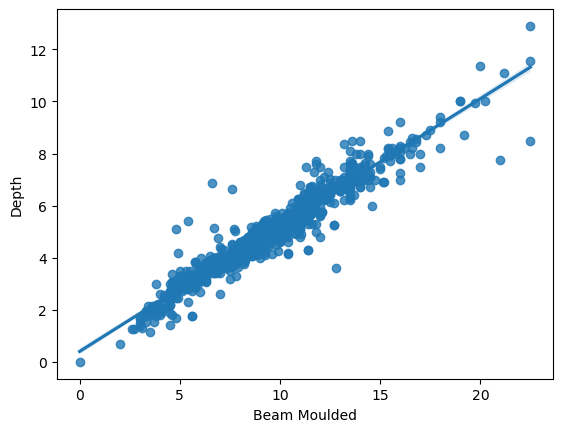

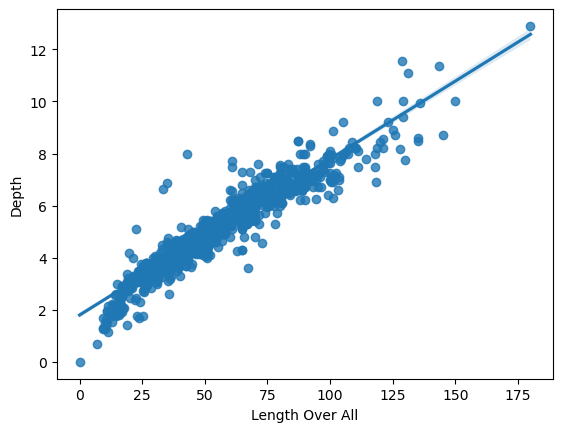

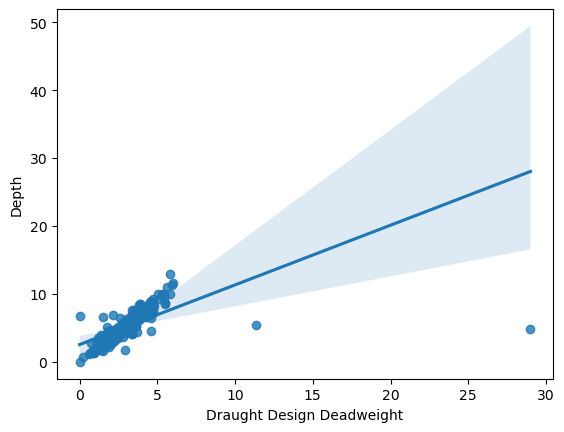

In [6]:
# Visualize seperate relationships to eyeball linearity
plt.figure()
sns.regplot(x=Bmld, y=D, data=tabel) #Beam Moulded vs Depth
plt.show()

plt.figure()
sns.regplot(x=Loa, y=D, data=tabel) #Lentgh over All vs Depth
plt.show()

plt.figure()
sns.regplot(x=Tfull, y=D, data=tabel) #Draught Design Deadweight vs Depth
plt.show()

In [7]:
# Define variables for regression
x = tabel.loc[:, ~tabel.columns.isin(['Number', 'Yard', 'Depth'])]
y = D

# Run Regression
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit(cov_type="HC0")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Depth   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2271.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:52:08   Log-Likelihood:                -592.60
No. Observations:                1046   AIC:                             1193.
Df Residuals:                    1042   BIC:                             1213.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [8]:
# Install package
from sklearn.metrics import mean_squared_error

# Calculate predicted values
predicted_values = results.predict(x)

# Add column to dataframe
tabel['Predicted_Depth_OLS'] = predicted_values
print(tabel[['Depth', 'Predicted_Depth_OLS']].head())

# Calculate MSE
mse = mean_squared_error(y, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Bereken RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

   Depth  Predicted_Depth_OLS
0   4.80             6.751036
1   5.50             6.062033
2  11.55            10.872579
3  11.35            10.280645
4   9.93            10.060926
Mean Squared Error (MSE): 0.18180765219387396
Root Mean Squared Error (RMSE): 0.4263890854535021


### Voorspel hieronder Depth mbv het bootnummer

In [9]:
# Veronderstel dat de 'Number'-kolom de identificatiewaarde 'YN807 DN2722' bevat
number_value = 'YN674  DN2600'

# Zoek de rij die overeenkomt met de waarde in de kolom 'Number'
row = tabel[tabel['Number'] == number_value]

if row.empty:
    print(f"De waarde '{number_value}' komt niet voor in de kolom 'Number'.")
else:
    # Verkrijg de voorspelde waarde voor deze specifieke rij
    predicted_value_for_row = row['Predicted_Depth_OLS'].values[0]
    print(f'Voorspelde waarde voor de rij met Number "{number_value}": {predicted_value_for_row}')

Voorspelde waarde voor de rij met Number "YN674  DN2600": 5.866111592228043


Validation model check

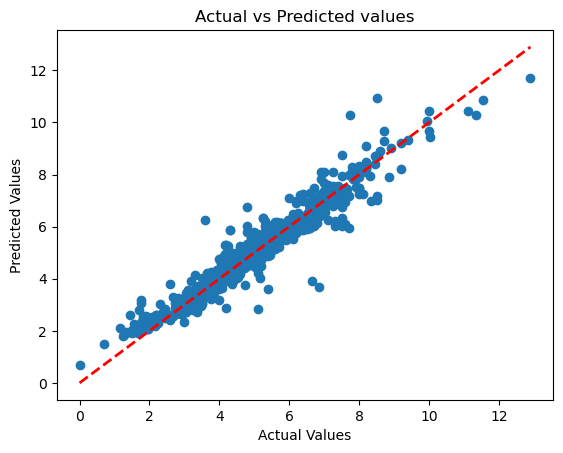

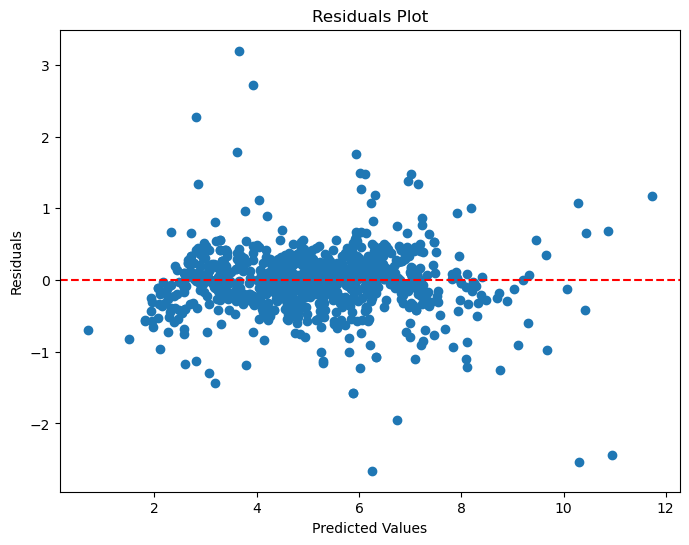

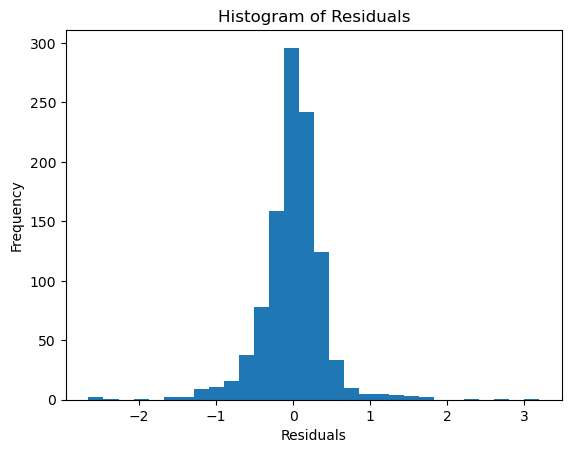

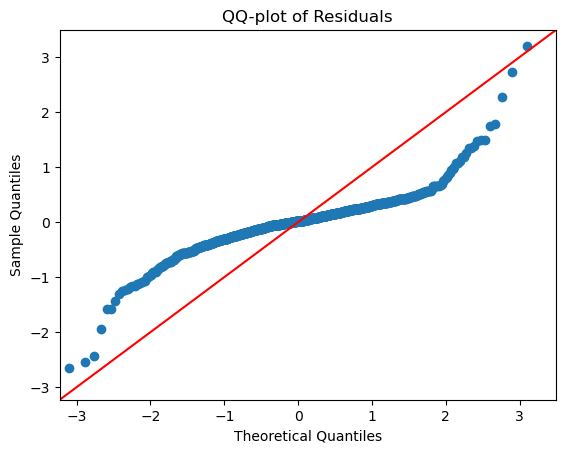

In [10]:
# Actual vs Predicted values
plt.scatter(y, predicted_values)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonale lijn
plt.title('Actual vs Predicted values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Check residuals for normality
residuals_OLS = y - predicted_values

# Residuals Plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals_OLS)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#Lijkt niet helemaal willekeurig maar wel dichtbij! --> Welllicht outliers impact

# Historgram of Residuals: are they normally distributed?
plt.hist(residuals_OLS, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Install packages
import statsmodels.api as sm

# QQ-plot of Residuals
sm.qqplot(residuals_OLS, line='45')
plt.title('QQ-plot of Residuals')
plt.show()
# Dunnere distributie dan normaal, te ver van lijn af, non-lineariteit of outliers skewness?


In [11]:
# Reset de index van de tabel om een doorlopende numerieke index te hebben
tabel = tabel.reset_index(drop=True)

# Z-score for outliers
z_scores = np.abs((residuals_OLS - np.mean(residuals_OLS)) / np.std(residuals_OLS))

# Filter outliers > 3
outliers = np.where(z_scores > 3)
print(f'Outliers indexen: {outliers}')
print(len(outliers[0]))

# Delete outliers and save new dataframe
tabel_clean = tabel.drop(index=outliers[0]) # 17 rows deleted
rows_to_drop = tabel_clean[tabel_clean['Number'].isin(['DN2583','DN2540','DN2180 BN642'])].index # 3 extra rows deleted: DN2583 DN2540 
tabel_cleaned = tabel_clean.drop(index=rows_to_drop)

print(f'Nieuwe dataset zonder outliers heeft {tabel_cleaned.shape[0]} rijen en {tabel_cleaned.shape[1]} kolommen.')
tabel_cleaned

Outliers indexen: (array([   0,    7,   16,  122,  123,  164,  301,  302,  326,  351,  354,
        423,  559,  730,  826,  916,  948,  971, 1037], dtype=int64),)
19
Nieuwe dataset zonder outliers heeft 1025 rijen en 7 kolommen.


,Number,Yard,Length Over All,Draught Design Deadweight,Depth,Beam Moulded,Predicted_Depth_OLS
2,DN3423,NaN,128.80,6.00,11.55,22.50,10.872579
3,YN831 DN3365,"Royal van Lent, Amsterdam",143.50,5.95,11.35,20.00,10.280645
4,DN3331,NaN,136.00,5.83,9.93,19.75,10.060926
5,DN2631,NaN,180.00,5.80,12.90,22.50,11.722042
6,DN3403,NaN,131.00,5.60,11.10,21.20,10.443621
...,...,...,...,...,...,...,...
1040,DN1653,NaN,25.30,0.75,2.72,5.60,3.060291
1041,DN1611,NaN,9.25,0.70,1.25,2.70,1.814988
1042,DN1589,NaN,11.45,0.61,1.15,3.50,2.112787
1043,DN1602,NaN,7.00,0.25,0.69,2.00,1.507680


In [12]:
# Save new excel without outliers
tabel_clean_2 = tabel_cleaned.drop(columns=['Predicted_Depth_OLS'])
tabel_clean_2.to_excel('Main Dimensions Cleaned.xlsx', index=False) 
tabel_clean_2.head()
print(f'Nieuwe dataset zonder outliers heeft {tabel_clean_2.shape[0]} rijen en {tabel_clean_2.shape[1]} kolommen.')

Nieuwe dataset zonder outliers heeft 1025 rijen en 6 kolommen.


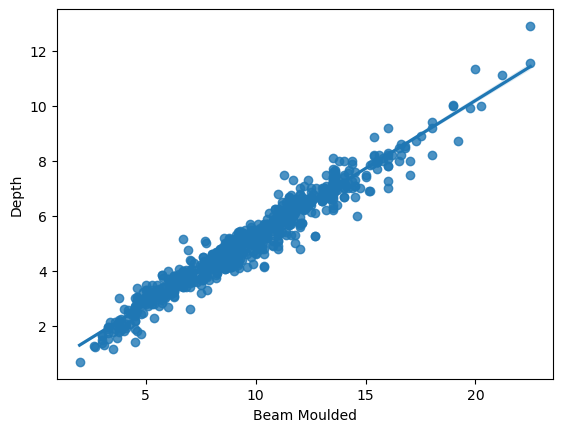

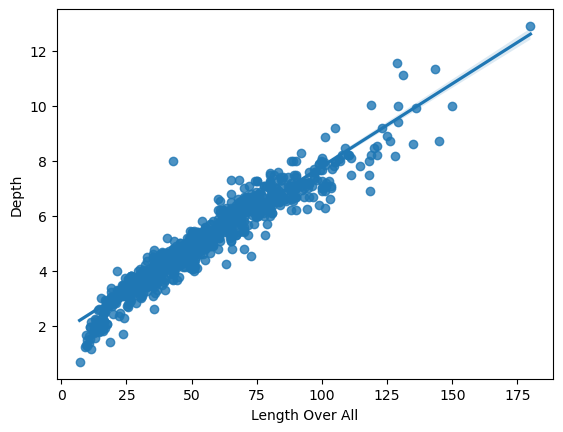

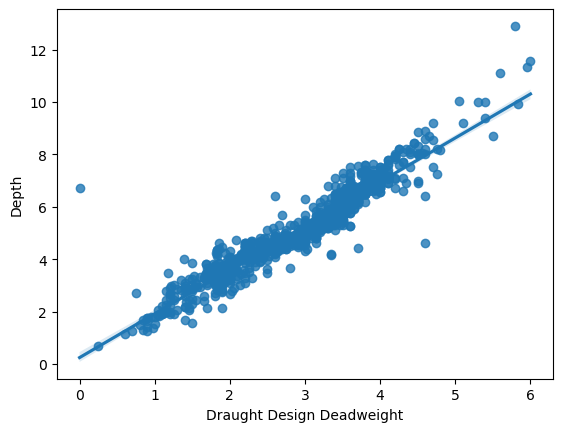

In [13]:
# Rename variables
Loa_cleaned = tabel_cleaned['Length Over All']
Tfull_cleaned = tabel_cleaned['Draught Design Deadweight']
D_cleaned = tabel_cleaned['Depth']
Bmld_cleaned = tabel_cleaned['Beam Moulded']

# Visualize seperate relationships without outliers
plt.figure()
sns.regplot(x=Bmld_cleaned, y=D_cleaned, data=tabel_cleaned)
plt.show()

plt.figure()
sns.regplot(x=Loa_cleaned, y=D_cleaned, data=tabel_cleaned)
plt.show()

plt.figure()
sns.regplot(x=Tfull_cleaned, y=D_cleaned, data=tabel_cleaned)
plt.show()

### Regression OLS: predict Depth (without outliers)

In [14]:
# Define variables for regression
x_cleaned = tabel_cleaned.loc[:, ~tabel_cleaned.columns.isin(['Number', 'Yard', 'Depth', 'Predicted_Depth_OLS'])]
y_cleaned = D_cleaned

# Run Regression
x_cleaned = sm.add_constant(x_cleaned)
model_cleaned = sm.OLS(y_cleaned, x_cleaned)
results_cleaned = model_cleaned.fit(cov_type="HC0")
print(results_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                  Depth   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     4459.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:52:10   Log-Likelihood:                -235.77
No. Observations:                1025   AIC:                             479.5
Df Residuals:                    1021   BIC:                             499.3
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [15]:
# Calculate predicted values without outliers
predicted_cleaned = results_cleaned.predict(x_cleaned)

# Add column to cleaned dataframe
tabel_cleaned['Predicted_Depth_OLS'] = predicted_cleaned 
print(tabel_cleaned[['Depth', 'Predicted_Depth_OLS']].head())

# Calculate MSE
mse_cleaned  = mean_squared_error(y_cleaned , predicted_cleaned )
print(f"Mean Squared Error (MSE): {mse_cleaned }")

# Bereken RMSE
rmse_cleaned  = np.sqrt(mse_cleaned )
print(f"Root Mean Squared Error (RMSE): {rmse_cleaned }")

   Depth  Predicted_Depth_OLS
2  11.55            10.956851
3  11.35            10.430661
4   9.93            10.217051
5  12.90            11.428286
6  11.10            10.426574
Mean Squared Error (MSE): 0.09275036192012626
Root Mean Squared Error (RMSE): 0.30454944084684554


Validation Model without Outliers check

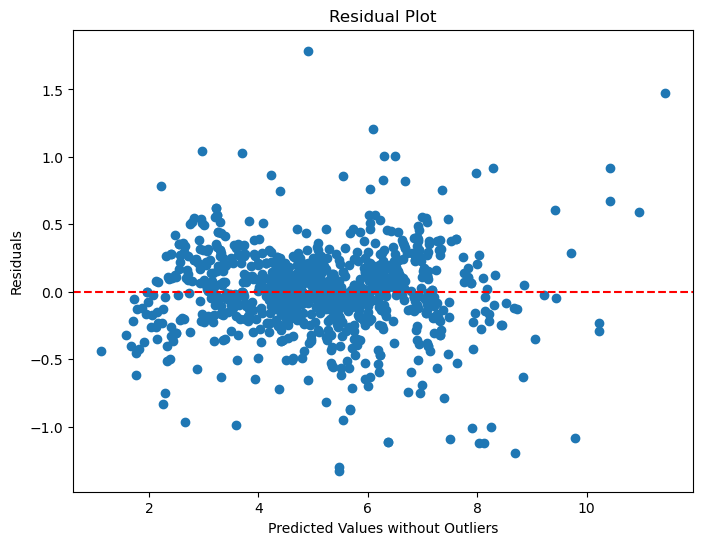

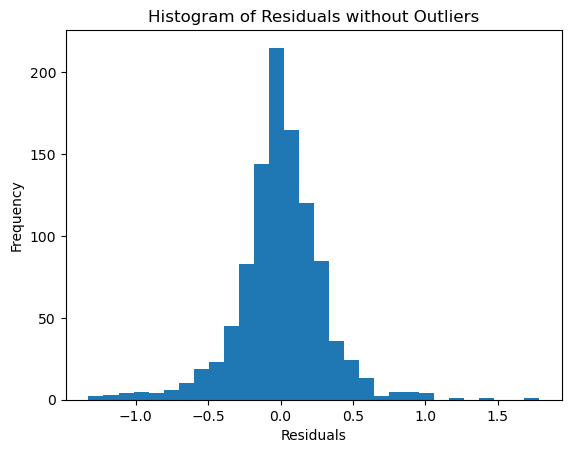

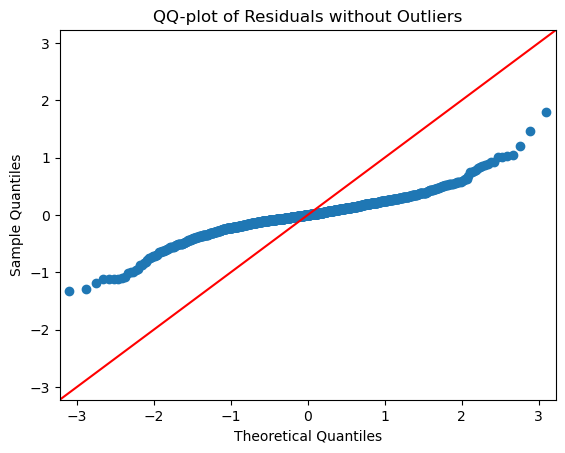

In [16]:
# Check residuals for normality
residuals_OLS_cleaned = y_cleaned - predicted_cleaned

# Plot de residuals
plt.figure(figsize=(8, 6))
plt.scatter(predicted_cleaned, residuals_OLS_cleaned)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values without Outliers')
plt.ylabel('Residuals')
plt.show()

#Lijkt niet helemaal willekeurig maar wel dichtbij! --> Welllicht outliers impact

# Check of residuals normaal verdeeld zijn
plt.hist(residuals_OLS_cleaned, bins=30)
plt.title('Histogram of Residuals without Outliers')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Install packages
import statsmodels.api as sm

# QQ-plot van residuals
sm.qqplot(residuals_OLS_cleaned, line='45')
plt.title('QQ-plot of Residuals without Outliers')
plt.show()

### Voorspel hieronder Depth mbv het bootnummer

In [17]:
# Veronderstel dat de 'Number'-kolom de identificatiewaarde 'YN807 DN2722' bevat
number_value = 'YN674  DN2600'

# Zoek de rij die overeenkomt met de waarde in de kolom 'Number'
row = tabel_cleaned[tabel_cleaned['Number'] == number_value]

if row.empty:
    print(f"De waarde '{number_value}' komt niet voor in de kolom 'Number'.")
else:
    # Verkrijg de voorspelde waarde voor deze specifieke rij
    predicted_value_for_row = row['Predicted_Depth_OLS'].values[0]
    print(f'Voorspelde waarde voor de rij met Number "{number_value}": {predicted_value_for_row}')

Voorspelde waarde voor de rij met Number "YN674  DN2600": 6.037582980360757


### Predict Depth: fill in your specific values here! 

In [18]:
# Fill in the green numbers which correspond to the variable names in red before it:

Depth_prediction = results.params['const'] +(results_cleaned.params['Length Over All']*95.65) +(results_cleaned.params['Beam Moulded']*14)+(results_cleaned.params['Draught Design Deadweight']*3.85)
print('Dit is de voorspelling volgens robuuste OLS:', Depth_prediction)

Dit is de voorspelling volgens robuuste OLS: 7.5147698742451325


### Vanaf hier begint RANDOM FOREST METHOD (without outliers)

In [19]:
# Prepare data: split dataset for validation purposes
x_train, x_test, y_train, y_test = train_test_split(x_cleaned, y_cleaned, test_size = 0.2, random_state = 42) # Use 20% for testing and 80% for training

#Install package
from sklearn.ensemble import RandomForestRegressor

# Initializing the Random Forest Regression model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, random_state = 42) # Random_state ensures consistency of the output results

Cross-validation for training model performance:

In [20]:
# Install package
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation for the Random Forest model
cv_scores = cross_val_score(rf, x_cleaned, y_cleaned, cv=5, scoring='r2')

print("The results of the cross-validation:")
print(f'R² scores with 5-folded cross-validation: {cv_scores}')
print(f'Average R² score: {np.mean(cv_scores)}')

n = x_cleaned.shape[0]  # Number observations in the dataset
p = x_cleaned.shape[1]  # Number observations in the dataset

adjusted_r2_scores = [1 - ((1 - r2) * (n - 1) / (n - p - 1)) for r2 in cv_scores]
print(f'Adjusted R² scores of the cross-validation: {adjusted_r2_scores}')
print(f'Average adjusted R² score: {np.mean(adjusted_r2_scores)}')

The results of the cross-validation:
R² scores with 5-folded cross-validation: [-0.32139875  0.58239501  0.49370692  0.37968888  0.195112  ]
Average R² score: 0.2659008132255707
Adjusted R² scores of the cross-validation: [-0.32658070562003627, 0.5807573461651968, 0.49172146023465, 0.37725629038506525, 0.19195557326151846]
Average adjusted R² score: 0.2630219928852789


Fitting the Random Forest model:

In [21]:
# Fitting the Random Forest Regression model to the data
rf_model = rf.fit(x_train, y_train)

# R² voor de trainingsset
y_train_pred = rf.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
print(f'R² op de trainingsset: {r2_train}')

# R² voor de testset
y_test_pred = rf.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
print(f'R² op de testset: {r2_test}')

# MSE en RMSE voor de testset
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(f'Mean Squared Error (MSE) op de testset: {mse_test}')
print(f'Root Mean Squared Error (RMSE) op de testset: {rmse_test}')

R² op de trainingsset: 0.993157665760146
R² op de testset: 0.9600010259911698
Mean Squared Error (MSE) op de testset: 0.09956172827405133
Root Mean Squared Error (RMSE) op de testset: 0.3155340366332154


Extract importances for each variable (weights)

In [22]:
# Extract list of importance weights for variables
importances = list(rf.feature_importances_)

# Redefine X since it is a dataframe
indp_variables = x_cleaned.columns if hasattr(x_cleaned, 'columns') else x

 # List of tuples: combine variables with importances
x_importances = [(indp_variable, round(importance, 2)) for indp_variable, importance in zip(indp_variables, importances)]
x_importances = sorted(x_importances, key=lambda x_cleaned: x_cleaned[1], reverse=True) # Sort to most important first

# Print out the independant variables and their importance
for indp_variable, importance in x_importances:
    print(f'Variable: {indp_variable:20} Importance: {importance}')

Variable: Beam Moulded         Importance: 0.8
Variable: Length Over All      Importance: 0.11
Variable: Draught Design Deadweight Importance: 0.1
Variable: const                Importance: 0.0


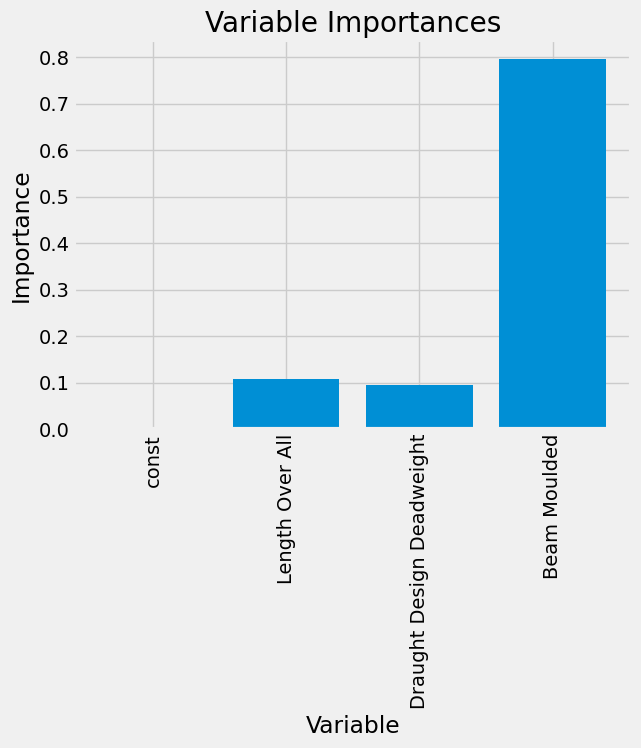

In [23]:
#Set x_values as range on x-axis
x_values = list(range(len(importances)))

# Create boxplot for variable importances
plt.style.use('fivethirtyeight')
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_cleaned, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

Validation model check

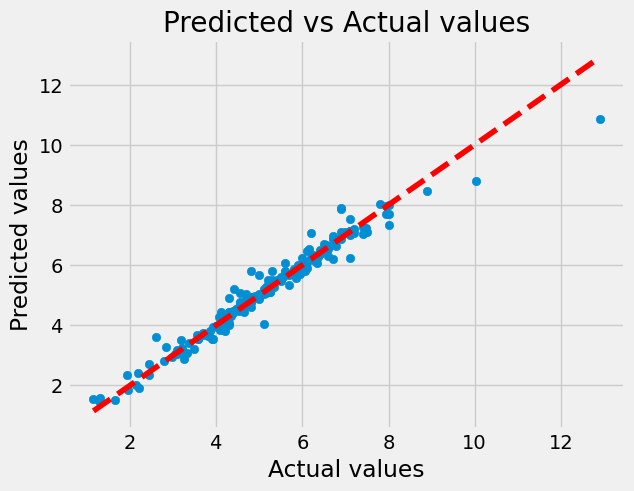

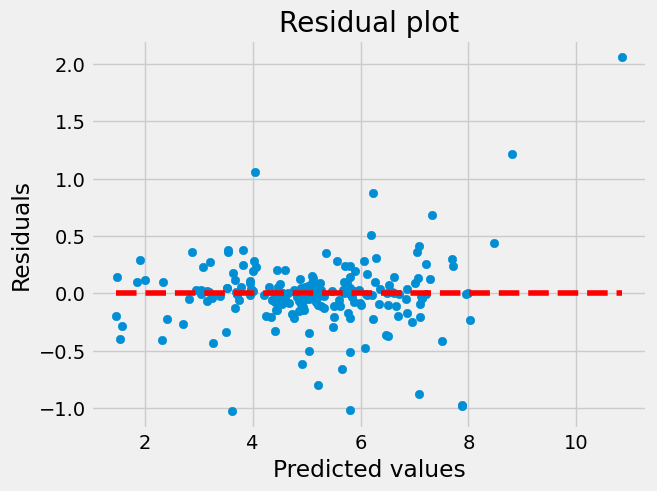

In [24]:
# Plot Actual vs Predicted values
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.show()

# Check residuals for normality
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test_pred, residuals)
plt.hlines(0, min(y_test_pred), max(y_test_pred), colors='red', linestyles='dashed')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

###  Voorspel hieronder Depth mbv waarden input

In [25]:
# Vul hieronder de waarden van de gewenste boot in
############################

x_new_data = {
    'const': [0], 
    'Length Over All': [95.65],
    'Draught Design Deadweight': [3.85],
    'Beam Moulded': [14],
}

# Create a DataFrame for X_new
x_new = pd.DataFrame(x_new_data)
print(x_new)

# Predict the target values (y) using the trained model
y_new_pred_rf = rf.predict(x_new)
print('This will be the predicted Depth with this trained random forest model:', y_new_pred_rf)

   const  Length Over All  Draught Design Deadweight  Beam Moulded
0      0            95.65                       3.85            14
This will be the predicted Depth with this trained random forest model: [7.12964212]


In [26]:
# All predictions for rf
predictions_rf = rf.predict(x_cleaned)
tabel_cleaned['Predicted_Depth_RF'] = predictions_rf
tabel_cleaned['residual_RF'] = y_cleaned - predictions_rf
tabel_cleaned['residual_RF %'] = ((predictions_rf -y_cleaned) / y_cleaned)*100
pd.options.display.max_rows = None
tabel_cleaned.head()

,Number,Yard,Length Over All,Draught Design Deadweight,Depth,Beam Moulded,Predicted_Depth_OLS,Predicted_Depth_RF,residual_RF,residual_RF %
2,DN3423,NaN,128.8,6.00,11.55,22.50,10.956851,11.3440,0.2060,-1.783550
3,YN831 DN3365,"Royal van Lent, Amsterdam",143.5,5.95,11.35,20.00,10.430661,10.8929,0.4571,-4.027313
4,DN3331,NaN,136.0,5.83,9.93,19.75,10.217051,10.3008,-0.3708,3.734139
5,DN2631,NaN,180.0,5.80,12.90,22.50,11.428286,10.8464,2.0536,-15.919380
6,DN3403,NaN,131.0,5.60,11.10,21.20,10.426574,10.7108,0.3892,-3.506306


In [27]:
tabel[tabel['Number'].str.contains('YN807  DN2722', na=False)]

,Number,Yard,Length Over All,Draught Design Deadweight,Depth,Beam Moulded,Predicted_Depth_OLS
177,YN807 DN2722,"Royal van Lent, de Kaag",62.0,3.7,6.2,11.8,5.984742


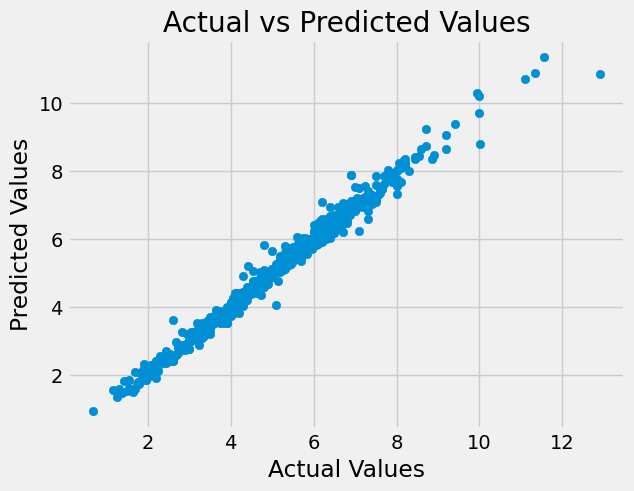

In [28]:
# van test en train set
plt.scatter(y_cleaned, predictions_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

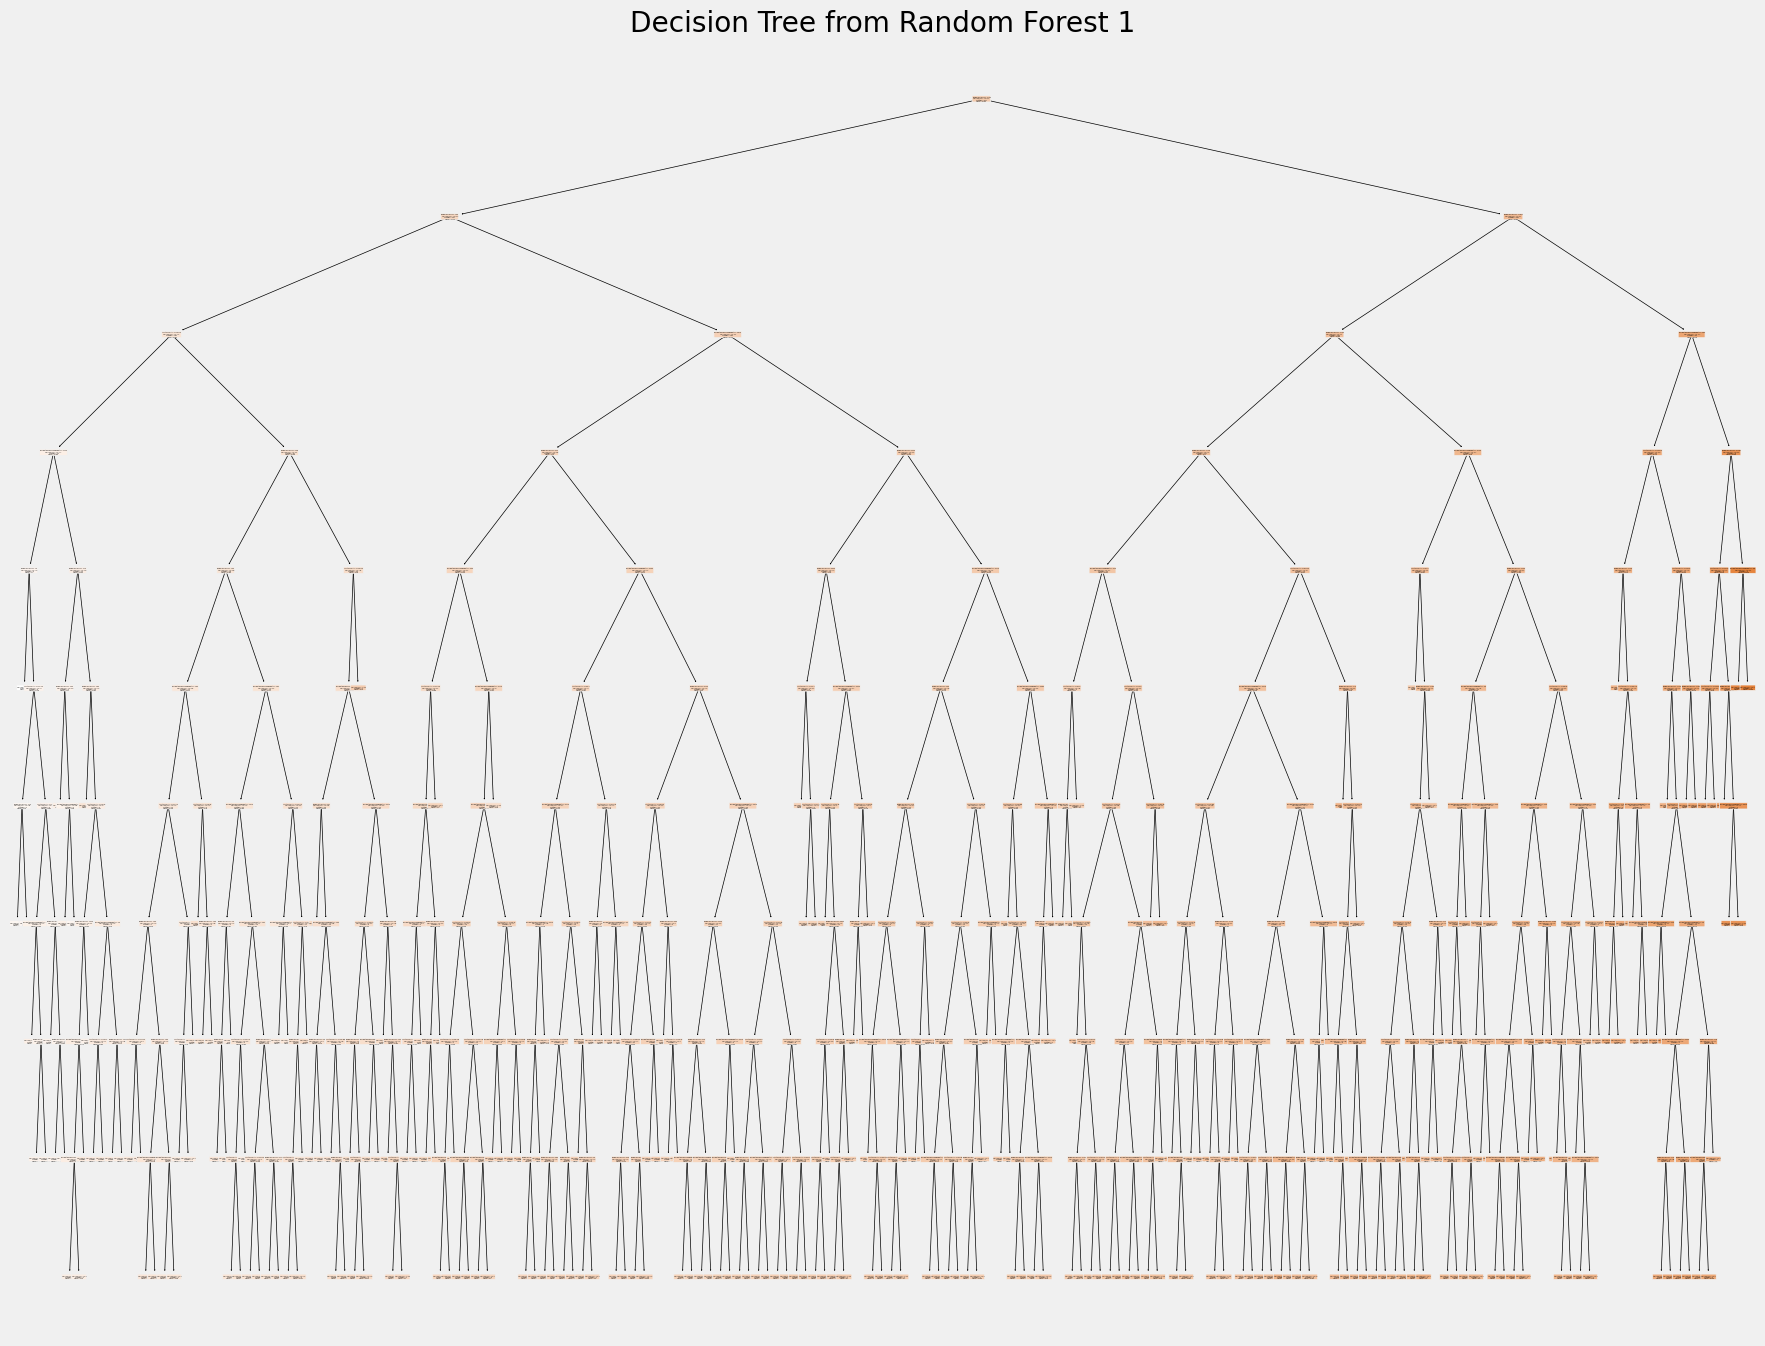

In [29]:
# Visualize random forest tree 1
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 16))
plot_tree(rf.estimators_[0], feature_names=x_cleaned.columns, filled=True, rounded=True)
plt.title("Decision Tree from Random Forest 1")
plt.savefig('random tree out1.pdf')
plt.show()

Ideeen voor Random Forest: 
- checken op heterogeniteit van groepen
- subsets DN en YN archief etc